In [19]:
import stan
import nest_asyncio
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
path = '/home/matvey/Документы/Data_Analysis_in_Biology_and_Medicine/Практика в росспотребнадзоре'

In [5]:
df = pd.read_csv(f'{path}/test.csv')
df

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


In [27]:
df_scale = df / 100
df_scale

,x,y
0,0.77,0.797752
1,0.21,0.231773
2,0.22,0.256093
3,0.20,0.178574
4,0.36,0.418499
...,...,...
295,0.71,0.685459
296,0.46,0.473349
297,0.55,0.540906
298,0.62,0.632972


In [28]:
#b_list
nest_asyncio.apply()
example_code = """
data {
  int<lower=0> N;
  vector[N] x;
  vector[N] y;
}
parameters {
  real a;
  real b;
  real<lower=0> sigma;
}
model {
  //priors
  a ~ normal(0, 0.5); //item random effects
  b ~ normal(0, 1); //item random effects
  y ~ normal(a + b * x, sigma);
}
"""

example_data = {"N": 300,
                "x": df_scale.x.to_list(),
                "y": df_scale.y.to_list()}

posterior = stan.build(example_code, data=example_data)
fit = posterior.sample(num_chains=10)

Building: found in cache, done.
Messages from stanc:
Sampling:   0%
Sampling:  10% (2000/20000)
Sampling:  20% (4000/20000)
Sampling:  30% (6000/20000)
Sampling:  40% (8000/20000)
Sampling:  50% (10000/20000)
Sampling:  60% (12000/20000)
Sampling:  70% (14000/20000)
Sampling:  80% (16000/20000)
Sampling:  90% (18000/20000)
Sampling: 100% (20000/20000)
Sampling: 100% (20000/20000), done.
Messages received during sampling:
  Gradient evaluation took 5.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.52 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/httpstan_kpiqyabq/model_bfosdj6x.stan', line 16, column 2 to column 31)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but i

In [29]:
results = fit.to_frame()
results

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,a,b,sigma
draws,,,,,,,,,,
0,894.979555,0.971946,0.296382,3.0,11.0,0.0,-893.093294,-0.004727,1.013711,0.031186
1,892.360010,0.877145,0.268556,4.0,15.0,0.0,-890.934681,-0.011601,1.022083,0.029241
2,894.866536,0.990805,0.292580,3.0,15.0,0.0,-892.879245,-0.004679,1.015858,0.029461
3,894.747624,0.999840,0.277850,4.0,15.0,0.0,-894.391538,-0.003805,1.013071,0.031570
4,893.663209,0.999523,0.283150,3.0,7.0,0.0,-889.760162,-0.000805,1.012001,0.029375
...,...,...,...,...,...,...,...,...,...,...
9995,894.402139,0.875402,0.298574,3.0,9.0,0.0,-891.362197,-0.002978,1.014318,0.031523
9996,894.817762,0.977757,0.354609,2.0,3.0,0.0,-894.325645,-0.003884,1.013962,0.029285
9997,893.393886,0.880467,0.324868,2.0,3.0,0.0,-893.233932,-0.006262,1.021548,0.029270


In [30]:
results.a.mean()

-0.004569797907872159

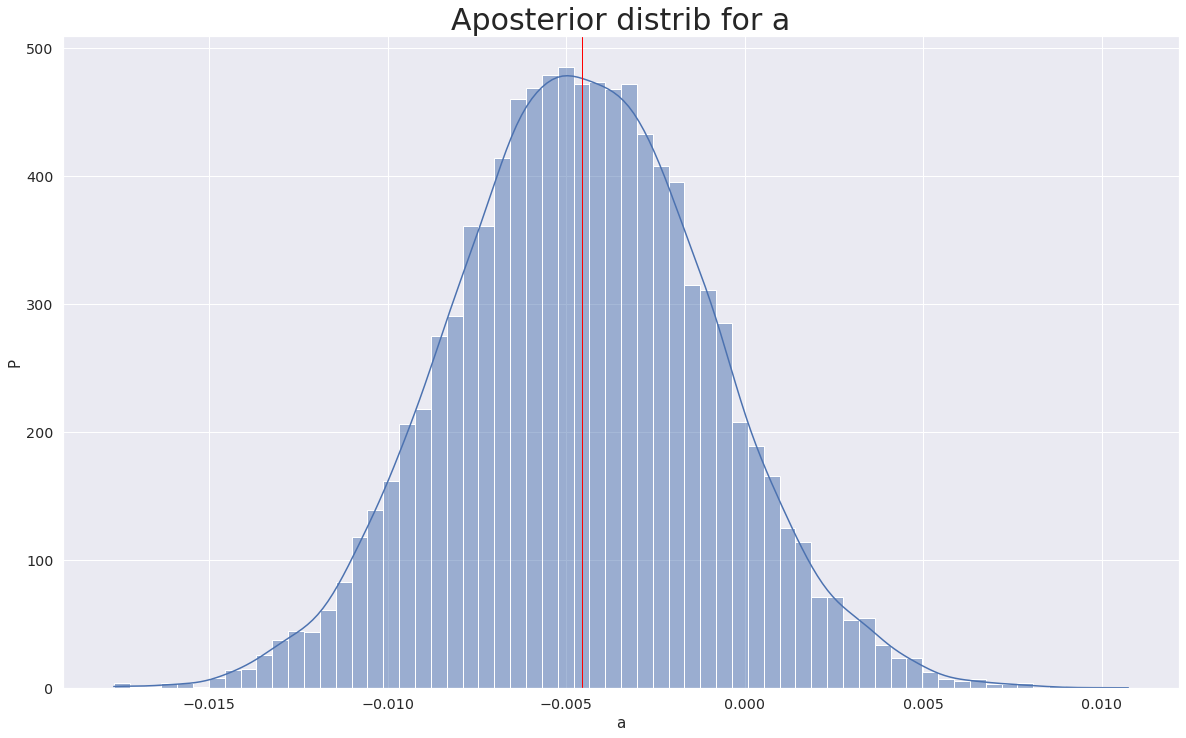

In [31]:
sns.set(rc={'figure.figsize':(20,12)}, font_scale=1.3)
a_scatterplot = sns.histplot(results.a, kde=True)
a_scatterplot.set_title('Aposterior distrib for a',fontsize=30)
a_scatterplot.set_ylabel("P",fontsize=15)
a_scatterplot.set_xlabel("a",fontsize=15)
plt.axvline(x=results.a.mean(), linewidth=1, color='red')

In [32]:
results.b.mean()

1.014236205668824

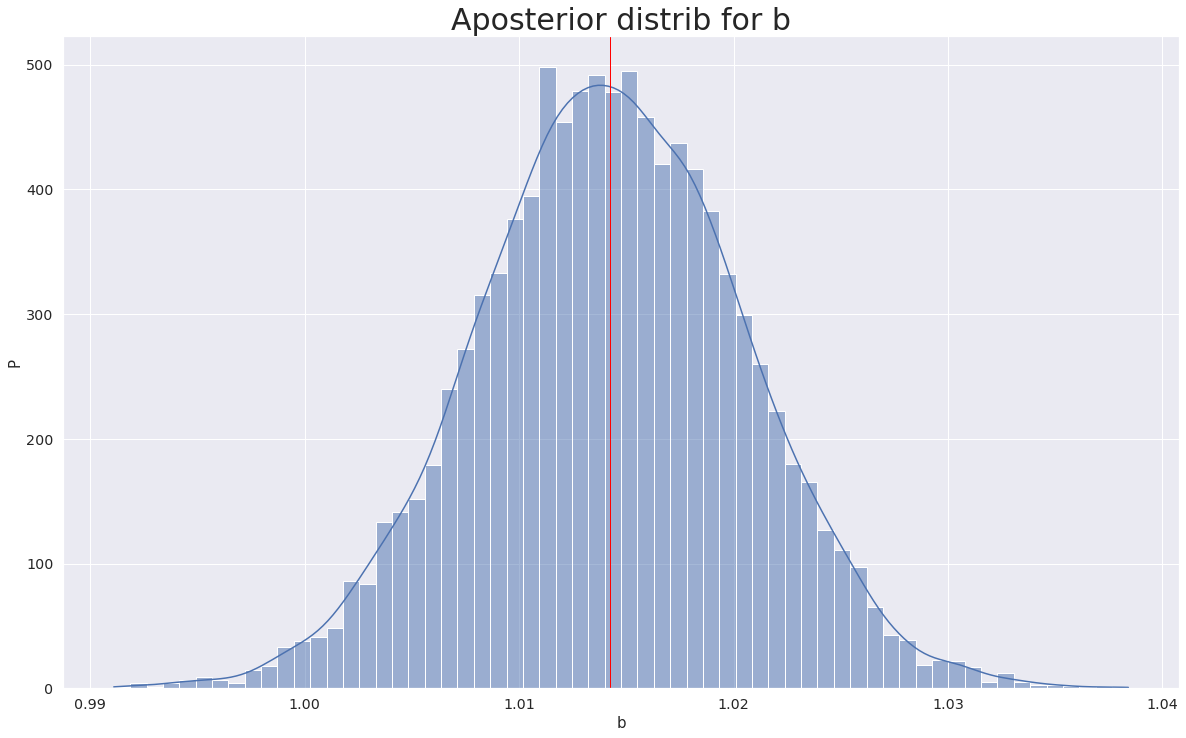

In [33]:
sns.set(rc={'figure.figsize':(20,12)}, font_scale=1.3)
a_scatterplot = sns.histplot(results.b, kde=True)
a_scatterplot.set_title('Aposterior distrib for b',fontsize=30)
a_scatterplot.set_ylabel("P",fontsize=15)
a_scatterplot.set_xlabel("b",fontsize=15)
plt.axvline(x=results.b.mean(), linewidth=1, color='red')

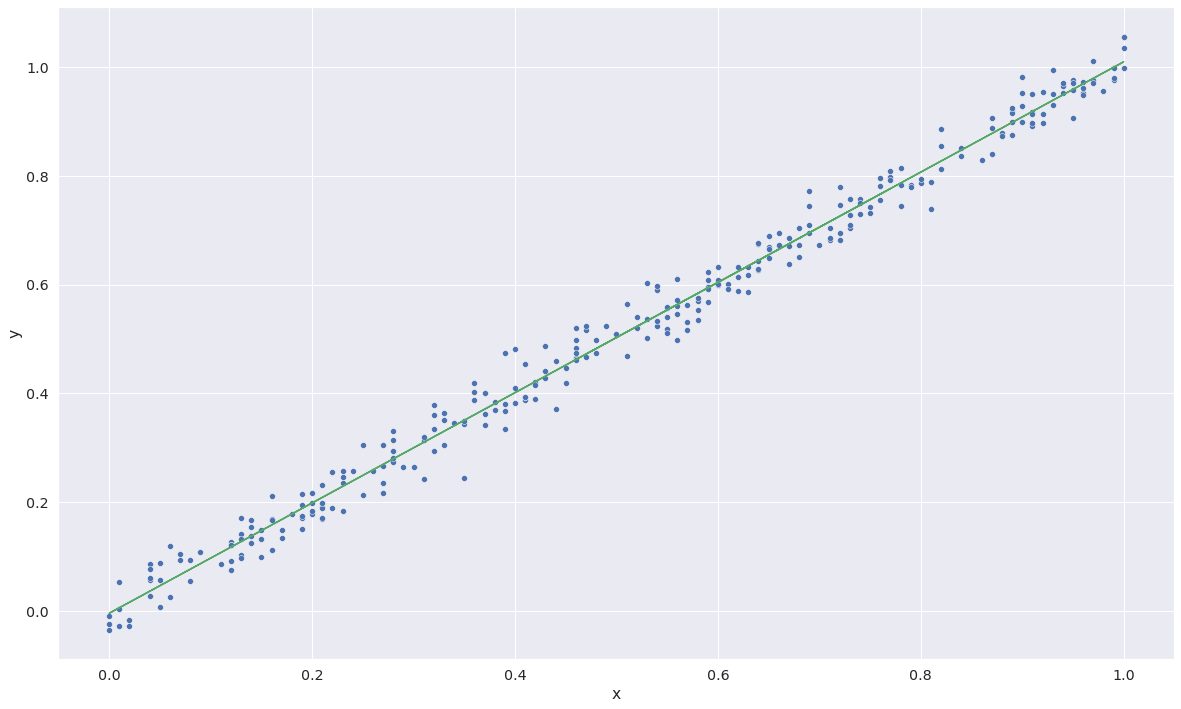

In [35]:
fig = sns.scatterplot(data=df_scale, x="x", y="y")

y_fit_2 = results.b.mean()*np.array(df_scale.x.to_list())+results.a.mean()
plt.plot(df_scale.x, y_fit_2, '-g')